In [1]:
import re
import pandas as pd

In [2]:
f = open('WhatsApp Chat with Lb_dsc_Jan 3rd Wknd.txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

12/3/20, 12:12 PM - Apoorva Nayyer Lb created group "Lb_dsc_Jan 3rd Wknd"
12/3/20, 12:12 PM - You were added
11/25/21, 8:18 AM - Sandip LB: Hey @917081929249 , our Power BI was completed by Rajeev Sir, I am late to find that Class 1 pdf notes are not available in the drive. Can you ask him for the same??
11/25/21, 10:55 AM - Simran: Hi ...sure will ask him to upload
11/26/21, 6:54 PM - Simran added +91 90022 73736
11/27/21, 8:30 AM - +91 90022 73736: Guys we will start in 5 mins
11/27/21, 4:59 PM - Shankar Wagh: @917081929249 mam upload today's  lecture on lms( time series)
11/27/21, 5:03 PM - Simran: will be uploaded within 15 minutes
11/27/21, 5:03 PM - Shankar Wagh: Ok thanks
11/28/21, 6:38 AM - +91 90022 73736: Team am having extreme stomach aches this morning. I am afraid i cannot take today's class. We will continue from next week. I will make up for the missed class in our next classes. Sorry for the inconveniences caused!
11/28/21, 7:38 AM - +91 83760 80602: No problem sir, tak

In [5]:
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s?(?:AM|PM|am|pm)\s-\s"

In [6]:
messages = re.split(pattern, data)[1:]

In [7]:
messages

['Apoorva Nayyer Lb created group "Lb_dsc_Jan 3rd Wknd"\n',
 'You were added\n',
 'Sandip LB: Hey @917081929249 , our Power BI was completed by Rajeev Sir, I am late to find that Class 1 pdf notes are not available in the drive. Can you ask him for the same??\n',
 'Simran: Hi ...sure will ask him to upload\n',
 'Simran added +91 90022 73736\n',
 '+91 90022 73736: Guys we will start in 5 mins\n',
 "Shankar Wagh: @917081929249 mam upload today's  lecture on lms( time series)\n",
 'Simran: will be uploaded within 15 minutes\n',
 'Shankar Wagh: Ok thanks\n',
 "+91 90022 73736: Team am having extreme stomach aches this morning. I am afraid i cannot take today's class. We will continue from next week. I will make up for the missed class in our next classes. Sorry for the inconveniences caused!\n",
 '+91 83760 80602: No problem sir, take care\n',
 'Shankar Wagh: Ok sir, take care\n',
 'Sandip LB: Take care sir\n',
 'Satya Lb1: No Problem... Please take care\n']

In [8]:
# pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s?(?:AM|PM|am|pm)"

In [9]:
dates = re.findall(pattern, data)

In [10]:
dates

['12/3/20, 12:12 PM - ',
 '12/3/20, 12:12 PM - ',
 '11/25/21, 8:18 AM - ',
 '11/25/21, 10:55 AM - ',
 '11/26/21, 6:54 PM - ',
 '11/27/21, 8:30 AM - ',
 '11/27/21, 4:59 PM - ',
 '11/27/21, 5:03 PM - ',
 '11/27/21, 5:03 PM - ',
 '11/28/21, 6:38 AM - ',
 '11/28/21, 7:38 AM - ',
 '11/28/21, 7:43 AM - ',
 '11/28/21, 7:56 AM - ',
 '11/28/21, 8:33 AM - ']

In [11]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format="%m/%d/%y, %I:%M %p - ")
df.rename(columns={'message_date':'date'}, inplace=True)
df.head()

,user_message,date
0,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r...",2020-12-03 12:12:00
1,You were added\n,2020-12-03 12:12:00
2,"Sandip LB: Hey @917081929249 , our Power BI wa...",2021-11-25 08:18:00
3,Simran: Hi ...sure will ask him to upload\n,2021-11-25 10:55:00
4,Simran added +91 90022 73736\n,2021-11-26 18:54:00


In [12]:
# separate user and message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages

In [13]:
df = df.drop('user_message',axis=1)

In [14]:
df.head()

,date,user,message
0,2020-12-03 12:12:00,group_notification,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r..."
1,2020-12-03 12:12:00,group_notification,You were added\n
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed..."
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n
4,2021-11-26 18:54:00,group_notification,Simran added +91 90022 73736\n


In [15]:
df['year'] = df['date'].dt.year

In [16]:
df['month'] = df['date'].dt.month_name()

In [17]:
df['day'] = df['date'].dt.day

In [18]:
df['hour'] = df['date'].dt.hour

In [19]:
df['minute'] = df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2020-12-03 12:12:00,group_notification,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r...",2020,December,3,12,12
1,2020-12-03 12:12:00,group_notification,You were added\n,2020,December,3,12,12
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed...",2021,November,25,8,18
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n,2021,November,25,10,55
4,2021-11-26 18:54:00,group_notification,Simran added +91 90022 73736\n,2021,November,26,18,54


In [21]:
words = []
for message in df['message']:
    words.extend(message.split())

In [22]:
len(words)

137

In [23]:
from urlextract import URLExtract
extracter = URLExtract()
urls = extracter.find_urls('hi this is myname.com, and gmail.com')

In [24]:
urls

['myname.com', 'gmail.com']

In [25]:
links = []
for message in df['message']:
    links.extend(extracter.find_urls(message))

In [26]:
links

[]

In [27]:
df

,date,user,message,year,month,day,hour,minute
0,2020-12-03 12:12:00,group_notification,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r...",2020,December,3,12,12
1,2020-12-03 12:12:00,group_notification,You were added\n,2020,December,3,12,12
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed...",2021,November,25,8,18
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n,2021,November,25,10,55
4,2021-11-26 18:54:00,group_notification,Simran added +91 90022 73736\n,2021,November,26,18,54
5,2021-11-27 08:30:00,+91 90022 73736,Guys we will start in 5 mins\n,2021,November,27,8,30
6,2021-11-27 16:59:00,Shankar Wagh,@917081929249 mam upload today's lecture on l...,2021,November,27,16,59
7,2021-11-27 17:03:00,Simran,will be uploaded within 15 minutes\n,2021,November,27,17,3
8,2021-11-27 17:03:00,Shankar Wagh,Ok thanks\n,2021,November,27,17,3
9,2021-11-28 06:38:00,+91 90022 73736,Team am having extreme stomach aches this morn...,2021,November,28,6,38


In [28]:
x = df['user'].value_counts().head()

In [29]:
name = x.index
count = x.values

In [30]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

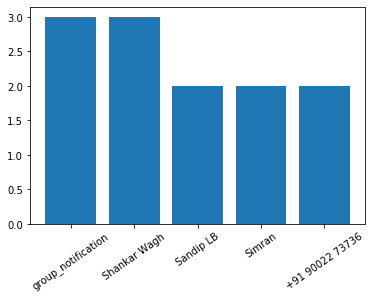

In [31]:
plt.bar(name, count)
plt.xticks(rotation='35')

In [32]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,name,percent
0,group_notification,21.43
1,Shankar Wagh,21.43
2,Sandip LB,14.29
3,Simran,14.29
4,+91 90022 73736,14.29
5,+91 83760 80602,7.14
6,Satya Lb1,7.14


In [33]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [34]:
temp

,date,user,message,year,month,day,hour,minute
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed...",2021,November,25,8,18
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n,2021,November,25,10,55
5,2021-11-27 08:30:00,+91 90022 73736,Guys we will start in 5 mins\n,2021,November,27,8,30
6,2021-11-27 16:59:00,Shankar Wagh,@917081929249 mam upload today's lecture on l...,2021,November,27,16,59
7,2021-11-27 17:03:00,Simran,will be uploaded within 15 minutes\n,2021,November,27,17,3
8,2021-11-27 17:03:00,Shankar Wagh,Ok thanks\n,2021,November,27,17,3
9,2021-11-28 06:38:00,+91 90022 73736,Team am having extreme stomach aches this morn...,2021,November,28,6,38
10,2021-11-28 07:38:00,+91 83760 80602,"No problem sir, take care\n",2021,November,28,7,38
11,2021-11-28 07:43:00,Shankar Wagh,"Ok sir, take care\n",2021,November,28,7,43
12,2021-11-28 07:56:00,Sandip LB,Take care sir\n,2021,November,28,7,56


In [35]:
import nltk

In [36]:
from nltk.corpus import stopwords

In [37]:
stopwords_eng = stopwords.words('english')

In [38]:
f = open('stop_hinglish.txt',encoding='utf-8')

In [39]:
stop_words_hing = f.read()

In [40]:
len(stopwords_eng)

179

In [41]:
len(stop_words_hing)

6008

In [42]:
len(stopwords_eng) + len(stop_words_hing)

6187

In [43]:
for word in stop_words_hing:
    stopwords_eng.extend(word)

In [44]:
len(stopwords_eng)

6187

In [45]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords_eng:
            words.append(word)

In [46]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,take,5
1,care,4
2,"sir,",3
3,@917081929249,2
4,class,2
5,ask,2
6,upload,2
7,today's,2
8,ok,2
9,next,2


In [47]:
# !pip install emoji

In [48]:
import emoji

In [49]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [50]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

""


In [51]:
df['month_num'] = df['date'].dt.month

In [52]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2020-12-03 12:12:00,group_notification,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r...",2020,December,3,12,12,12
1,2020-12-03 12:12:00,group_notification,You were added\n,2020,December,3,12,12,12
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed...",2021,November,25,8,18,11
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n,2021,November,25,10,55,11
4,2021-11-26 18:54:00,group_notification,Simran added +91 90022 73736\n,2021,November,26,18,54,11
5,2021-11-27 08:30:00,+91 90022 73736,Guys we will start in 5 mins\n,2021,November,27,8,30,11
6,2021-11-27 16:59:00,Shankar Wagh,@917081929249 mam upload today's lecture on l...,2021,November,27,16,59,11
7,2021-11-27 17:03:00,Simran,will be uploaded within 15 minutes\n,2021,November,27,17,3,11
8,2021-11-27 17:03:00,Shankar Wagh,Ok thanks\n,2021,November,27,17,3,11
9,2021-11-28 06:38:00,+91 90022 73736,Team am having extreme stomach aches this morn...,2021,November,28,6,38,11


In [53]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [54]:
timeline

,year,month_num,month,message
0,2020,12,December,2
1,2021,11,November,12


In [55]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+str(timeline['year'][i]))

In [56]:
timeline['time'] = time

In [57]:
timeline

,year,month_num,month,message,time
0,2020,12,December,2,December-2020
1,2021,11,November,12,November-2021


C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Shankar Wagh SNR\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


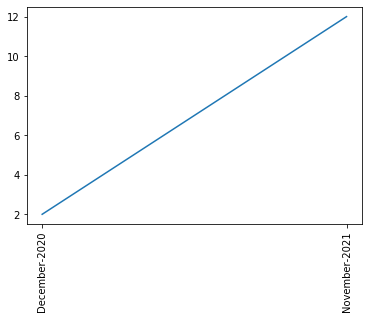

In [58]:
plt.plot(timeline['time'], timeline['message'])
plt.xticks(rotation='90')
plt.show()

In [62]:
df['only_date'] = df['date'].dt.date

In [63]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2020-12-03 12:12:00,group_notification,"Apoorva Nayyer Lb created group ""Lb_dsc_Jan 3r...",2020,December,3,12,12,12,2020-12-03
1,2020-12-03 12:12:00,group_notification,You were added\n,2020,December,3,12,12,12,2020-12-03
2,2021-11-25 08:18:00,Sandip LB,"Hey @917081929249 , our Power BI was completed...",2021,November,25,8,18,11,2021-11-25
3,2021-11-25 10:55:00,Simran,Hi ...sure will ask him to upload\n,2021,November,25,10,55,11,2021-11-25
4,2021-11-26 18:54:00,group_notification,Simran added +91 90022 73736\n,2021,November,26,18,54,11,2021-11-26
5,2021-11-27 08:30:00,+91 90022 73736,Guys we will start in 5 mins\n,2021,November,27,8,30,11,2021-11-27
6,2021-11-27 16:59:00,Shankar Wagh,@917081929249 mam upload today's lecture on l...,2021,November,27,16,59,11,2021-11-27
7,2021-11-27 17:03:00,Simran,will be uploaded within 15 minutes\n,2021,November,27,17,3,11,2021-11-27
8,2021-11-27 17:03:00,Shankar Wagh,Ok thanks\n,2021,November,27,17,3,11,2021-11-27
9,2021-11-28 06:38:00,+91 90022 73736,Team am having extreme stomach aches this morn...,2021,November,28,6,38,11,2021-11-28


In [73]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

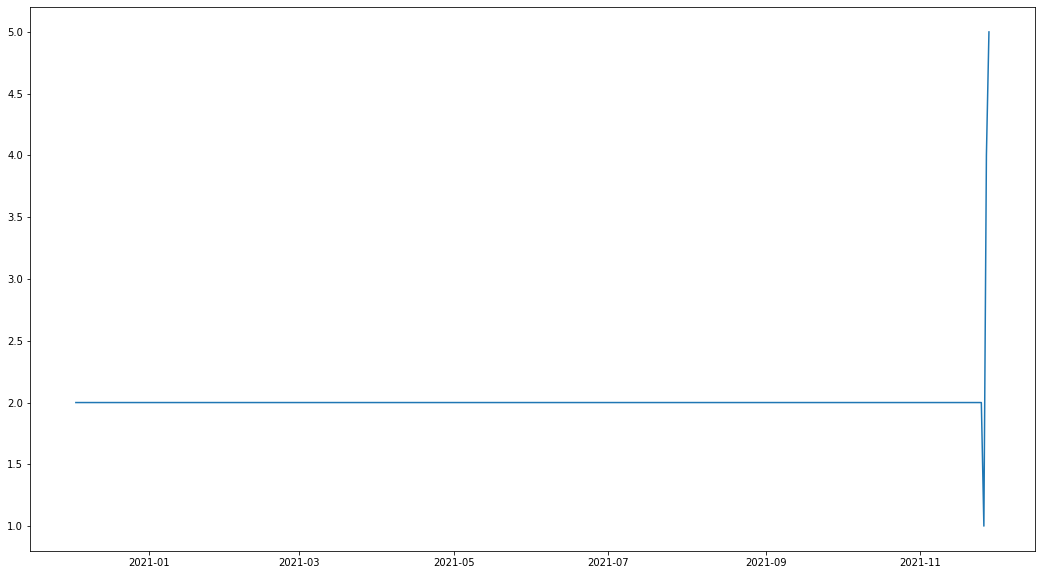

In [75]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])

In [96]:
# pd.to_datetime('11/28/21, 5:33 PM',format="%m/%d/%y, %I:%M %p")

Timestamp('2021-11-28 17:33:00')

In [97]:
# def date_extract(data):
#     pt = "\d{1,2}/\d{1,2}/\d{2,4}"
#     date = re.findall(pt, data)
#     return date

In [98]:
# date_extract('12/3/20, 12:12 PM -')

['12/3/20']

In [99]:
# df['date'] = df['message_date'].apply(lambda X:date_extract(X)[0])

KeyError: 'message_date'

In [ ]:
# def time_extract(data):
#     pt = "\d{1,2}:\d{1,2}\s?(?:AM|PM|am|pm)"
#     date = re.findall(pt, data)
#     return date

In [ ]:
# time_extract('12/3/20, 12:12 PM -')[0]

In [ ]:
# df['time'] = df['message_date'].apply(lambda X:time_extract(X)[0])

In [ ]:
# df.head()

In [ ]:
# df['date'] = pd.to_datetime(df['date'])
# df['time'] = pd.to_datetime(df['time'],origin="unix")

In [ ]:
# df

In [ ]:
# df.rename(columns={'message_date':'date'}, inplace=True)
# df.head()